In [60]:
# COMECO (Importar os dados)

########################################
#         Data Import from Sheets      #
########################################
import gspread
import pandas as pd
from datetime import datetime, timedelta
import calendar
import matplotlib.pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials
import smtplib
from email.message import EmailMessage
from dotenv import load_dotenv
import os
import mimetypes
from pathlib import Path

load_dotenv()
email_password = os.getenv('EMAIL_PASSWORD')

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('C:/Users/lohan/PythonProjects/3 - Finances/finances-411402-17fda5da6f27.json', scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = '1K-EDM6ETO7yH-x-yFHSdqgxGxTufGSboxYvvpZF1nKo'
spreadsheet = client.open_by_key(spreadsheet_key)


# Open specific Sheet based on title
sheet_title = 'Expenses'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
data = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
data = pd.DataFrame(data)

all_food = data[data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]
all_food['Timestamp'] = pd.to_datetime(all_food['Timestamp'])


#SILVER1
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

expenses_data = expenses_data[expenses_data['Timestamp'].dt.to_period('M') != '2023-02']


# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

# Current date
current_date = datetime.now()

this_month = current_date.strftime("%B")

this_year = current_date.strftime("%Y")


if current_date.weekday() >= 4:  # Friday = 4, Saturday = 5, Sunday = 6
    week_start = (current_date - timedelta(days=current_date.weekday() - 4)).replace(hour=0, minute=0, second=0)
else:
    week_start = (current_date - timedelta(days=current_date.weekday() + 3)).replace(hour=0, minute=0, second=0)

week_end = (week_start + timedelta(days=6)).replace(hour=23, minute=59, second=59)

# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]

# Sum of expenses for the current week
current_week_expenses1 = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses1 = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()

# Days until the end of this week
days_until_end_of_week = (week_end - current_date).days

# Outputting the report
week_start_str = week_start.strftime('%Y-%m-%d')
week_end_str = week_end.strftime('%Y-%m-%d')


############################################################################

# Resampling data to a weekly basis and summing expenses by type
weekly_resampled_data = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='W-Thu')]).sum().reset_index()

# Pivot the data to have expense types as columns for plotting
pivot_data = weekly_resampled_data.pivot_table(values='Expense Amount', index='Timestamp', aggfunc='sum')

average_spending = pivot_data.mean().sum()


############################################################################

filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food'])]


# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]

# Sum of expenses for the current week
current_week_expenses2 = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses2 = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()


############################################################################

############################################################################

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Groceries'])]

# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]


# Sum of expenses for the current week
current_week_expenses3 = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses3 = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()


############################################################################


# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

month_start = current_date.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
next_month_start = (month_start + timedelta(days=calendar.monthrange(month_start.year, month_start.month)[1])).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
month_end = (next_month_start - timedelta(days=1)).replace(hour=23, minute=59, second=59)

# Filter data for the current month
current_month_data = filtered_data[(filtered_data['Timestamp'] >= month_start) & (filtered_data['Timestamp'] <= month_end)]

# Sum of expenses for the current month
current_month_expenses1 = current_month_data['Expense Amount'].sum()

# Calculate monthly average expenses on food
monthly_average_expenses1 = filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().mean()

# Days until the end of the current month
days_until_end_of_month = (month_end - current_date).days

# Outputting the report
month_start_str = month_start.strftime('%Y-%m-%d')
month_end_str = month_end.strftime('%Y-%m-%d')


############################################################################

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food'])]

# Filter data for the current month
current_month_data = filtered_data[(filtered_data['Timestamp'] >= month_start) & (filtered_data['Timestamp'] <= month_end)]

# Sum of expenses for the current month
current_month_expenses2 = current_month_data['Expense Amount'].sum()

# Calculate monthly average expenses on food
monthly_average_expenses2 = filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().mean()


###########################################################################

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Groceries'])]

# Filter data for the current month
current_month_data = filtered_data[(filtered_data['Timestamp'] >= month_start) & (filtered_data['Timestamp'] <= month_end)]

# Sum of expenses for the current month
current_month_expenses3 = current_month_data['Expense Amount'].sum()

# Calculate monthly average expenses on food
monthly_average_expenses3 = filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().mean()

###########################################################################

filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

year_start = current_date.replace(month=1, day=1, hour=0, minute=0, second=0, microsecond=0)
next_year_start = (year_start.replace(year=year_start.year + 1))
year_end = (next_year_start - timedelta(seconds=1)).replace(hour=23, minute=59, second=59)

current_year_data = filtered_data[(filtered_data['Timestamp'] >= year_start) & (filtered_data['Timestamp'] <= year_end)]
last_years_data = filtered_data[(filtered_data['Timestamp'] < year_start)]

current_year_expenses1 = current_year_data['Expense Amount'].sum()

yearly_average_expenses1 = last_years_data.set_index('Timestamp').resample('YE')['Expense Amount'].sum().mean() + 450 + 450 # for february and january (estimate)

days_until_end_of_year = (year_end - current_date).days

year_start_day = current_date.replace(month=1, day=1, hour=0, minute=0, second=0, microsecond=0).strftime("%Y-%m-%d")
year_end_day = year_end.strftime("%Y-%m-%d")

year_start = year_start.strftime('%Y')

###################################

filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food'])]

current_year_data = filtered_data[(filtered_data['Timestamp'] >= year_start) & (filtered_data['Timestamp'] <= year_end)]
last_years_data = filtered_data[(filtered_data['Timestamp'] < year_start)]

current_year_expenses2 = current_year_data['Expense Amount'].sum()

yearly_average_expenses2 = last_years_data.set_index('Timestamp').resample('YE')['Expense Amount'].sum().mean()

####################################

filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Groceries'])]

current_year_data = filtered_data[(filtered_data['Timestamp'] >= year_start) & (filtered_data['Timestamp'] <= year_end)]
last_years_data = filtered_data[(filtered_data['Timestamp'] < year_start)]

current_year_expenses3 = current_year_data['Expense Amount'].sum()

yearly_average_expenses3 = last_years_data.set_index('Timestamp').resample('YE')['Expense Amount'].sum().mean()



#################################### saving images ###############

# Filter data for 'Restaurant/Fast Food' and 'Groceries' expense types
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

filtered_data = filtered_data[filtered_data['Timestamp'].dt.to_period('M') != '2023-02']

# Resampling data to a weekly basis and summing expenses by type
weekly_resampled_data = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='W-Thu')]).sum().reset_index()

# Pivot the data to have expense types as columns for plotting
pivot_data = weekly_resampled_data.pivot_table(values='Expense Amount', index='Timestamp', aggfunc='sum')

average_spending = pivot_data.mean().sum()


# Plotting the weekly spending with different colors for each expense type, stacked
plt.figure(figsize=(25, 6))
ax = pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Weekly Spending on Food')
plt.xlabel('Week Starting')
plt.ylabel('Expense Amount ($)')

# Formatting the x-axis to show the start of each week
x_labels = [item.strftime('%Y-%m-%d') for item in pivot_data.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)


# Annotating values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')


plt.legend(title='Expense Type')
plt.tight_layout()

plt.savefig('weekly_over_time.png')
plt.close()

########################################################

# Creating a pivot table to separate 'Restaurant/Fast Food' and 'Groceries' expenses by month
pivot_table = filtered_data.pivot_table(values='Expense Amount', index=pd.Grouper(key='Timestamp', freq='ME'), aggfunc='sum')
pivot_table

average_spending = pivot_table.mean().mean()

# Plotting the time series graph
plt.figure(figsize=(10, 5))
ax = pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Monthly Spending on Food')
plt.xlabel('Month')
plt.ylabel('Expense Amount ($)')
plt.ylim(0,900)

# Formatting the x-axis to show Year-Month labels
x_labels = [item.strftime('%Y-%m') for item in pivot_table.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)

# Annotating values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')

plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.savefig('monthly_over_time.png')
plt.close()

###########################################

data_for_comparison = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='W-Thu')]).sum().reset_index()

data_for_comparison = data_for_comparison[(data_for_comparison['Timestamp'] >= year_start) & (data_for_comparison['Timestamp'] <= year_end)]

data_for_comparison = data_for_comparison.pivot_table(values='Expense Amount', index='Timestamp', aggfunc='sum').reset_index()


def all_thursdays(year):
    # Start from January 1st of the given year
    date = datetime(year, 1, 1)
    # Move to the first Thursday
    while date.weekday() != 3:
        date += timedelta(days=1)
    # Generate all Thursdays
    thursdays = []
    while date.year == year:
        thursdays.append(date)
        date += timedelta(weeks=1)
    return thursdays

# Generate all Thursdays for the year 2024
yearly_thursdays = all_thursdays(int(this_year))

# Create a DataFrame
all_weeks_graph = pd.DataFrame(yearly_thursdays, columns=['Thursdays'])
all_weeks_graph = pd.merge(all_weeks_graph, data_for_comparison, how='left', left_on='Thursdays', right_on='Timestamp')
all_weeks_graph['Ideal Per Week'] = 86.54
all_weeks_graph['Estimated Per Week'] = weekly_average_expenses1

all_weeks_graph['Actuals'] = all_weeks_graph['Expense Amount'].cumsum()
all_weeks_graph['Ideal'] = all_weeks_graph['Ideal Per Week'].cumsum()
all_weeks_graph['Estimated'] = all_weeks_graph['Estimated Per Week'].cumsum()

actual_week_average = all_weeks_graph['Expense Amount'].mean()
ideal_per_week = 86.54

plt.figure(figsize=(12, 5))
plt.plot(all_weeks_graph['Thursdays'], all_weeks_graph['Estimated'], label=f'Estimated (${weekly_average_expenses1*52:,.2f} per year)', color='red')
plt.plot(all_weeks_graph['Thursdays'], all_weeks_graph['Ideal'], label='Ideal ($4,500 per year)', color = 'green')
plt.plot(all_weeks_graph['Thursdays'], all_weeks_graph['Actuals'], label='Actual', marker='o')

plt.title('Food Expense Comparison')
plt.xlabel('Date')
plt.ylabel('Expense')
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.savefig('comparison.png')
plt.close()

plt.figure(figsize=(12, 5))
plt.plot(all_weeks_graph['Thursdays'], all_weeks_graph['Estimated Per Week'], label=f'Estimated (${weekly_average_expenses1:,.2f} per week)', color='red')
plt.plot(all_weeks_graph['Thursdays'], all_weeks_graph['Ideal Per Week'], label='Ideal ($86.54 per week)', color = 'green')
plt.plot(all_weeks_graph['Thursdays'], all_weeks_graph['Expense Amount'], label='Actual', marker='o')

plt.title('Food Expense Per Week')
plt.xlabel('Date')
plt.ylabel('Expense')
plt.axhline(y=actual_week_average, color='blue', linestyle='--', label=f"This Year's Actual Average: ${actual_week_average:.2f}")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('comparison_per_week.png')
plt.close()

#############################

data_for_comparison2 = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='ME')]).sum().reset_index()

data_for_comparison2 = data_for_comparison2[(data_for_comparison2['Timestamp'] >= year_start) & (data_for_comparison2['Timestamp'] <= year_end)]

data_for_comparison2 = data_for_comparison2.pivot_table(values='Expense Amount', index='Timestamp', aggfunc='sum').reset_index()

# Generate all months for the current year
all_months_graph = pd.date_range(start=year_start_day, end=year_end_day, freq='M')
all_months_graph = pd.DataFrame({'Last Day of Month': all_months_graph})
all_months_graph = pd.merge(all_months_graph, data_for_comparison2, how='left', left_on='Last Day of Month', right_on='Timestamp')
all_months_graph['Ideal Per Month'] = 375
all_months_graph['Estimated Per Month'] = monthly_average_expenses1

all_months_graph['Actuals'] = all_months_graph['Expense Amount'].cumsum()
all_months_graph['Ideal'] = all_months_graph['Ideal Per Month'].cumsum()
all_months_graph['Estimated'] = all_months_graph['Estimated Per Month'].cumsum()

actual_month_average = all_months_graph['Expense Amount'].mean()
ideal_per_month = 375


plt.figure(figsize=(12, 5))
plt.plot(all_months_graph['Last Day of Month'], all_months_graph['Estimated Per Month'], label=f'Estimated (${monthly_average_expenses1:,.2f} per week)', color='red')
plt.plot(all_months_graph['Last Day of Month'], all_months_graph['Ideal Per Month'], label='Ideal ($375.00 per week)', color = 'green')
plt.plot(all_months_graph['Last Day of Month'], all_months_graph['Expense Amount'], label='Actual', marker='o')

plt.title('Food Expense Per Month')
plt.xlabel('Date')
plt.ylabel('Expense')
plt.axhline(y=actual_month_average, color='blue', linestyle='--', label=f"This Year's Actual Average: ${actual_month_average:.2f}")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('comparison_per_month.png')
plt.close()



################## EMAIL ##############################

tabela_semana = {
    ' ': ['Restaurants/Fast Food', 'Groceries', 'All Food'],
    'Actual': [f'${current_week_expenses2:.2f}', f'${current_week_expenses3:.2f}', f'${current_week_expenses1:.2f}'],
    'Average': [f'${weekly_average_expenses2:.2f}', f'${weekly_average_expenses3:.2f}', f'${weekly_average_expenses1:.2f}'],
    'Days Left': [days_until_end_of_week, days_until_end_of_week, days_until_end_of_week]
}

tabela_mes = {
    ' ': ['Restaurants/Fast Food', 'Groceries', 'All Food'],
    'Actual': [f'${current_month_expenses2:.2f}', f'${current_month_expenses3:.2f}', f'${current_month_expenses1:.2f}'],
    'Average': [f'${monthly_average_expenses2:.2f}', f'${monthly_average_expenses3:.2f}', f'${monthly_average_expenses1:.2f}'],
    'Days Left': [days_until_end_of_month, days_until_end_of_month, days_until_end_of_month]
}

tabela_ano = {
    ' ': ['Restaurants/Fast Food', 'Groceries', 'All Food'],
    'Actual': [f'${current_year_expenses2:,.2f}', f'${current_year_expenses3:,.2f}', f'${current_year_expenses1:,.2f}'],
    'Average*': [f'${monthly_average_expenses2*12:,.2f}', f'${monthly_average_expenses3*12:,.2f}', f'${monthly_average_expenses1*12:,.2f}'],
    'Days Left': [days_until_end_of_year, days_until_end_of_year, days_until_end_of_year]
}

tabela_mes = pd.DataFrame(tabela_mes)
tabela_semana = pd.DataFrame(tabela_semana)
tabela_ano = pd.DataFrame(tabela_ano)


css_styles = """
<style>
    .myDataFrame {
        width: 50%;
        border-collapse: collapse;
    }
    .myDataFrame, .myDataFrame th, .myDataFrame td {
        border: 1px solid black;
    }
    .myDataFrame th, .myDataFrame td {
        padding: 10px;
        text-align: left;
    }
    .myDataFrame tr:nth-child(even) {
        background-color: #f2f2f2;
    }
    .myDataFrame th {
        background-color: #9ba39b;
        color: white;
    }
    .myDataFrame td {
        text-align: center;
    }
    .card {
        box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);
        transition: 0.3s;
        width: 31%;
        border-radius: 5px;
        display: inline-block;
        text-align: center;
        font-family: Arial, sans-serif;
        margin: 2px;
    }

    .container {
        padding: 0px 0px;
        margin-bottom: -15px;
    }

    .card_text{
        font-size: 16px; 
    }

    .number {
        font-size: 25px;
        color: black;
        margin-top: 0px;
    }

    .final_card{
        box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);
        transition: 0.3s;
        width: 90%;
        border-radius: 5px;
        display: inline-block;
        text-align: center;
        font-family: Arial, sans-serif;
        margin: 2px;
    }


    .final_number{
        font-size: 30px;
        color: black;
    }

    .green {
        background-color: #a4eda7; /* Green background */
    }

    .red {
        background-color: #f57e76; /* Red background */
    }

    .yellow {
        background-color: #ecf0a1; /* Yellow background */
    }
</style>
"""


tabela_semana_html = tabela_semana.to_html(index=False, classes='myDataFrame')
tabela_mes_html = tabela_mes.to_html(index=False, classes='myDataFrame')
tabela_ano_html = tabela_ano.to_html(index=False, classes='myDataFrame')

available_for_the_day_week = weekly_average_expenses1 - current_week_expenses1
available_for_the_day_month = monthly_average_expenses1 - current_month_expenses1
available_for_the_day_year = yearly_average_expenses1 - current_year_expenses1
available_for_the_per_day_week = (weekly_average_expenses1 - current_week_expenses1)/days_until_end_of_week
available_for_the_per_day_month = (monthly_average_expenses1 - current_month_expenses1)/days_until_end_of_month
available_for_the_per_day_year = (yearly_average_expenses1 - current_year_expenses1)/days_until_end_of_year

card_class = "red" if current_week_expenses1 > weekly_average_expenses1  else ("yellow" if current_week_expenses1 > ideal_per_week else "green")
card_class2 = "green" if available_for_the_day_month > 0 else "red"
card_class3 = "red" if actual_week_average > weekly_average_expenses1 else ("yellow" if actual_week_average > ideal_per_week else "green") 



msg = EmailMessage()
msg['Subject'] = f'Food Expense Report {datetime.today().date().strftime("%m-%d-%Y")}'
msg['From'] = 'lohan.rossi@hotmail.com'
msg['To'] = 'lohan.rossi@hotmail.com'
msg.set_content('This is an automated email. Please find the HTML version for better formatting.')

# Path to your image
monthly_over_time = 'monthly_over_time.png'
mime_type, _ = mimetypes.guess_type(monthly_over_time)
mime_type, mime_subtype = mime_type.split('/')

weekly_over_time = 'weekly_over_time.png'
mime_type2, _ = mimetypes.guess_type(weekly_over_time)
mime_type2, mime_subtype2 = mime_type2.split('/')

comparison = 'comparison.png'
mime_type3, _ = mimetypes.guess_type(comparison)
mime_type3, mime_subtype3 = mime_type3.split('/')

comparison_per_week = 'comparison_per_week.png'
mime_type4, _ = mimetypes.guess_type(comparison_per_week)
mime_type4, mime_subtype4 = mime_type4.split('/')

comparison_per_month = 'comparison_per_month.png'
mime_type5, _ = mimetypes.guess_type(comparison_per_month)
mime_type5, mime_subtype5 = mime_type5.split('/')


# Add the HTML version
msg.add_alternative(f"""\
<!DOCTYPE html>
<html>
    <head>
        {css_styles}
    </head>
    <body>
        <h2>FOOD EXPENSE REPORT</h2>

        <div class="card {card_class}">
            <div class="container">
                <p class = "card_text">Available for the Week</p>
                <p class="number">${(available_for_the_day_week):.2f}</p>
                
            </div>
        </div>

        <div class="card">
            <div class="container">
                <p class = "card_text">Days left for the Week</p>
                <p class="number">{days_until_end_of_week}</p>
                
            </div>
        </div>

        <div class="card">
            <div class="container">
                <p class = "card_text">Available per Day</p>
                <p class="number">${(available_for_the_per_day_week):.2f}</p>
            </div>
        </div>

        <br>
        <br>

        <div class="card {card_class2}">
            <div class="container">
                <p class = "card_text">Available for the Month</p>
                <p class="number">${(available_for_the_day_month):.2f}</p>
            </div>
        </div>

        <div class="card">
            <div class="container">
                <p class = "card_text">Days left for the Month</p>
                <p class="number">{days_until_end_of_month}</p>
            </div>
        </div>

        <div class="card">
            <div class="container">
                <p class = "card_text">Available per Day</p>
                <p class="number">${(available_for_the_per_day_month):.2f}</p>
            </div>
        </div>

        <br>
        <br>

        <div class="card {card_class3}">
            <div class="container">
                <p class = "card_text">Available for the Year</p>
                <p class="number">${(available_for_the_day_year):.2f}</p>
            </div>
        </div>

        <div class="card">
            <div class="container">
                <p class = "card_text">Days left for the Year</p>
                <p class="number">{days_until_end_of_year}</p>
            </div>
        </div>

        <div class="card">
            <div class="container">
                <p class = "card_text">Available per Day</p>
                <p class="number">${(available_for_the_per_day_year):.2f}</p>
            </div>
        </div>

        <br><br><br><hr><br><br><br>

        <h3>THIS WEEK: {week_start_str} to {week_end_str}</h3>
        {tabela_semana_html}
        <img src="cid:{Path(weekly_over_time).name}" alt="Embedded Image">

        <br><br><br><hr><br><br><br>

        <h3>THIS MONTH: {this_month}</h3>
        {tabela_mes_html}
        <img src="cid:{Path(monthly_over_time).name}" alt="Embedded Image">

        <br><br><br><hr><br><br><br>

        <h3>THIS YEAR: {this_year}</h3>
        {tabela_ano_html}
        <p>*Average is based on Monthly Average * 12</p>

        <br><br><br><hr><br><br><br>

        <h3>GOALS</h3>

        <img src="cid:{Path(comparison).name}" alt="Embedded Image">

        <img src="cid:{Path(comparison_per_week).name}" alt="Embedded Image">

        <img src="cid:{Path(comparison_per_month).name}" alt="Embedded Image">

        <br>
        <br>
        
        <div class="final_card">
            <div class="container">
                <p>All Food Expenses since February, 2023</p>
                <p class = "final_number">${all_food['Expense Amount'].sum():,.2f}</p>
            </div>
        </div>

    </body>
</html>
""", subtype='html')

# Read the image
with open(monthly_over_time, 'rb') as img:
    msg.add_attachment(img.read(),
                       maintype=mime_type,
                       subtype=mime_subtype,
                       cid=Path(monthly_over_time).name)
    
# Read the image
with open(weekly_over_time, 'rb') as img:
    msg.add_attachment(img.read(),
                       maintype=mime_type2,
                       subtype=mime_subtype2,
                       cid=Path(weekly_over_time).name)
    
# Read the image
with open(comparison, 'rb') as img:
    msg.add_attachment(img.read(),
                       maintype=mime_type3,
                       subtype=mime_subtype3,
                       cid=Path(comparison).name)

# Read the image
with open(comparison_per_week, 'rb') as img:
    msg.add_attachment(img.read(),
                       maintype=mime_type4,
                       subtype=mime_subtype4,
                       cid=Path(comparison_per_week).name)

# Read the image
with open(comparison_per_month, 'rb') as img:
    msg.add_attachment(img.read(),
                       maintype=mime_type5,
                       subtype=mime_subtype5,
                       cid=Path(comparison_per_month).name)

smtp_server = 'smtp.office365.com'
port = 587  # For TLS
username = 'lohan.rossi@hotmail.com'
password = email_password

# Connect to the server
server = smtplib.SMTP(smtp_server, port)
server.starttls()  # Upgrade the connection to secure
server.login(username, password)

# Send the email
server.send_message(msg)
server.quit()


C:\Users\lohan\AppData\Local\Temp\ipykernel_22868\2135605389.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_food['Timestamp'] = pd.to_datetime(all_food['Timestamp'])
C:\Users\lohan\AppData\Local\Temp\ipykernel_22868\2135605389.py:390: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months_graph = pd.date_range(start=year_start_day, end=year_end_day, freq='M')


(221, b'2.0.0 Service closing transmission channel')

C:\Users\lohan\AppData\Local\Temp\ipykernel_22868\1437552237.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months_graph = pd.date_range(start=year_start_day, end=year_end_day, freq='M')


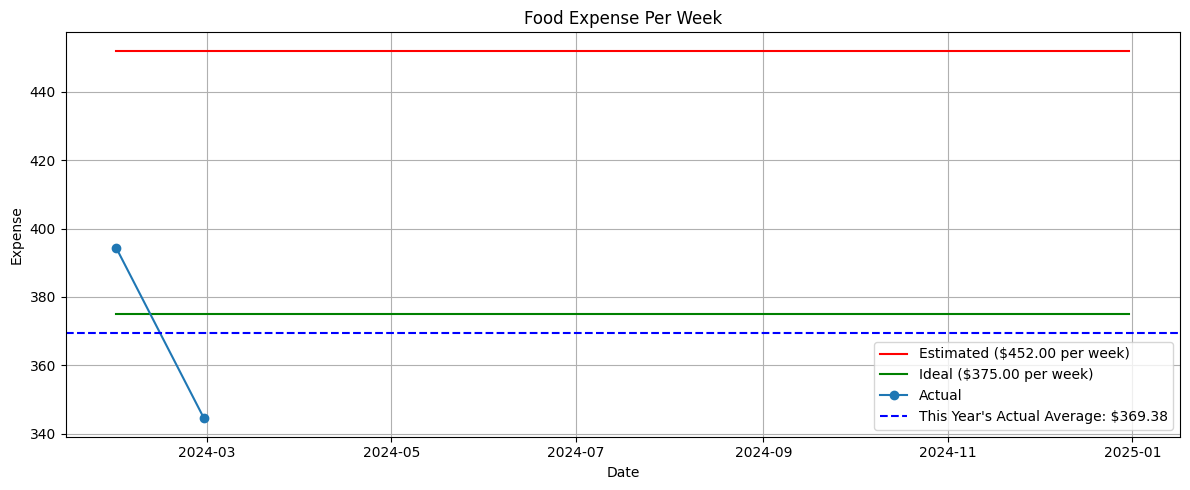

In [38]:

filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

filtered_data = filtered_data[filtered_data['Timestamp'].dt.to_period('M') != '2023-02']

data_for_comparison2 = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='ME')]).sum().reset_index()

data_for_comparison2 = data_for_comparison2[(data_for_comparison2['Timestamp'] >= year_start) & (data_for_comparison2['Timestamp'] <= year_end)]

data_for_comparison2 = data_for_comparison2.pivot_table(values='Expense Amount', index='Timestamp', aggfunc='sum').reset_index()

# Generate all months for the current year
all_months_graph = pd.date_range(start=year_start_day, end=year_end_day, freq='M')
all_months_graph = pd.DataFrame({'Last Day of Month': all_months_graph})
all_months_graph = pd.merge(all_months_graph, data_for_comparison2, how='left', left_on='Last Day of Month', right_on='Timestamp')
all_months_graph['Ideal Per Month'] = 375
all_months_graph['Estimated Per Month'] = monthly_average_expenses1

all_months_graph['Actuals'] = all_months_graph['Expense Amount'].cumsum()
all_months_graph['Ideal'] = all_months_graph['Ideal Per Month'].cumsum()
all_months_graph['Estimated'] = all_months_graph['Estimated Per Month'].cumsum()

actual_month_average = all_months_graph['Expense Amount'].mean()
ideal_per_month = 375


plt.figure(figsize=(12, 5))
plt.plot(all_months_graph['Last Day of Month'], all_months_graph['Estimated Per Month'], label=f'Estimated (${monthly_average_expenses1:,.2f} per week)', color='red')
plt.plot(all_months_graph['Last Day of Month'], all_months_graph['Ideal Per Month'], label='Ideal ($375.00 per week)', color = 'green')
plt.plot(all_months_graph['Last Day of Month'], all_months_graph['Expense Amount'], label='Actual', marker='o')

plt.title('Food Expense Per Month')
plt.xlabel('Date')
plt.ylabel('Expense')
plt.axhline(y=actual_month_average, color='blue', linestyle='--', label=f"This Year's Actual Average: ${actual_month_average:.2f}")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [55]:
data_for_comparison = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='W-Thu')]).sum().reset_index()

data_for_comparison = data_for_comparison[(data_for_comparison['Timestamp'] >= year_start) & (data_for_comparison['Timestamp'] <= year_end)]

data_for_comparison = data_for_comparison.pivot_table(values='Expense Amount', index='Timestamp', aggfunc='sum').reset_index()

data_for_comparison
pd.DataFrame(yearly_thursdays, columns=['Thursdays'])
pd.merge(all_weeks_graph, data_for_comparison, how='left', left_on='Thursdays', right_on='Timestamp')

,Thursdays,Timestamp_x,Expense Amount_x,Ideal Per Week,Estimated Per Week,Actuals,Ideal,Estimated,Timestamp_y,Expense Amount_y
0,2024-01-04,2024-01-04,68.26,86.54,104.307308,68.26,86.54,104.307308,2024-01-04,68.26
1,2024-01-11,2024-01-11,139.64,86.54,104.307308,207.90,173.08,208.614615,2024-01-11,139.64
2,2024-01-18,2024-01-18,119.93,86.54,104.307308,327.83,259.62,312.921923,2024-01-18,119.93
3,2024-01-25,2024-01-25,38.54,86.54,104.307308,366.37,346.16,417.229231,2024-01-25,38.54
4,2024-02-01,2024-02-01,108.62,86.54,104.307308,474.99,432.70,521.536538,2024-02-01,108.62
5,2024-02-08,2024-02-08,109.74,86.54,104.307308,584.73,519.24,625.843846,2024-02-08,109.74
6,2024-02-15,2024-02-15,49.23,86.54,104.307308,633.96,605.78,730.151154,2024-02-15,49.23
7,2024-02-22,2024-02-22,110.67,86.54,104.307308,744.63,692.32,834.458462,2024-02-22,110.67
8,2024-02-29,2024-02-29,62.40,86.54,104.307308,807.03,778.86,938.765769,2024-02-29,62.40
9,2024-03-07,NaT,NaN,86.54,104.307308,NaN,865.40,1043.073077,NaT,NaN


In [59]:
all_weeks_graph = pd.DataFrame(yearly_thursdays, columns=['Thursdays'])
all_weeks_graph = pd.merge(all_weeks_graph, data_for_comparison, how='left', left_on='Thursdays', right_on='Timestamp')
all_weeks_graph
all_weeks_graph['Expense Amount'].mean()
# current_date.replace(month=1, day=1, hour=0, minute=0, second=0, microsecond=0).strftime("%Y-%m-%d")

89.67

In [ ]:

# CSS FOR COMPUTER EMAIL
css_styles = """
<style>
    .myDataFrame {
        width: 50%;
        border-collapse: collapse;
    }
    .myDataFrame, .myDataFrame th, .myDataFrame td {
        border: 1px solid black;
    }
    .myDataFrame th, .myDataFrame td {
        padding: 10px;
        text-align: left;
    }
    .myDataFrame tr:nth-child(even) {
        background-color: #f2f2f2;
    }
    .myDataFrame th {
        background-color: #4CAF50;
        color: white;
    }
    .myDataFrame td {
        text-align: center;
    }
    .card {
        box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);
        transition: 0.3s;
        width: 20%;
        border-radius: 5px;
        display: inline-block;
        text-align: center;
        font-family: Arial, sans-serif;
        margin: 10px;
    }

    .container {
        padding: 2px 16px;
    }

    .number {
        font-size: 30px;
        color: black;
    }

    .green {
        background-color: #a4eda7; /* Green background */
    }

    .red {
        background-color: #f57e76; /* Red background */
    }
</style>
"""